In [0]:
# Read the data from the URL and print it
import urllib.request
# Open a connection URL using urllib
urllib.request.urlretrieve("https://www.gutenberg.org/files/65171/65171-0.txt" , "/tmp/sindhuja.txt")

Out[1]: ('/tmp/sindhuja.txt', <http.client.HTTPMessage at 0x7f76c43a6d00>)

In [0]:
dbutils.fs.mv("file:/tmp/sindhuja.txt","dbfs:/data/sindhuja.txt")

Out[2]: True

In [0]:
sindhujaRDD = sc.textFile("dbfs:/data/sindhuja.txt")

In [0]:
# flatmap each line to words
my_words_RDD=sindhujaRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
import re
clean_Tokens_RDD = my_words_RDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))

In [0]:
from pyspark.ml.feature import StopWordsRemover
remover =StopWordsRemover()
stopwords = remover.getStopWords()
clean_word_RDD=clean_Tokens_RDD.filter(lambda w: w not in stopwords)

In [0]:
IKV_Pairs_RDD= clean_word_RDD.map(lambda word: (word,1))

In [0]:
word_Count_RDD = IKV_Pairs_RDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
sindhujaresults = word_Count_RDD.collect()

In [0]:
sindhujaresults = word_Count_RDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(sindhujaresults)

[(11774, ''), (874, 'c'), (494, 'p'), (416, 'm'), (343, 'shell'), (330, 'species'), (275, 'genus'), (262, 'animal'), (256, 'h'), (250, 'two')]

Count Words
0 11774 
1 874 c
2 494 p
3 416 m
4 343 shell
5 330 species
6 275 genus
7 262 animal
8 256 h
9 250 two
Out[22]:

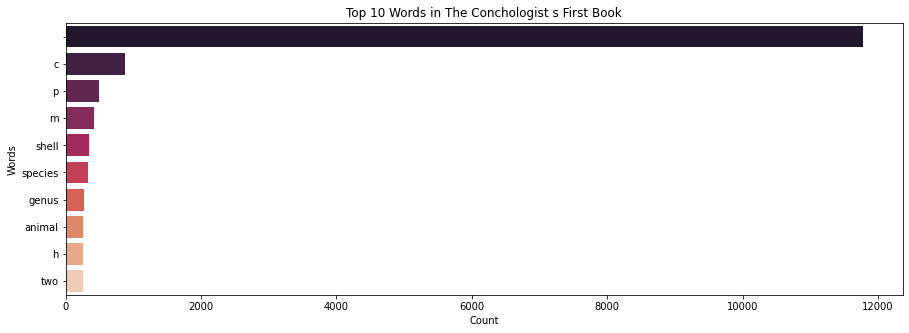

Text(0.5, 1.0, 'Top 10 Words in The Conchologist s First Book')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

source = 'The Conchologist s First Book'
title = 'Top 10 Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(sindhujaresults, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(15,5))
sns.barplot(xlabel, ylabel, data=df, palette="rocket").set_title(title)